# Desagregação dos Dados
A desagregação horária de dados é uma técnica que envolve a divisão de dados em intervalos de tempo menores, como horas, para permitir uma análise mais detalhada e precisa. É especialmente útil em diversas áreas, como meteorologia E economia, onde a análise de dados em intervalos menores pode revelar padrões e tendências que não seriam visíveis em uma análise mais ampla.

Também pode ser útil em situações que exigam a adequação dos dados para a utilização em outros processos como, por exemplo, em modelos de previsão e otimização.

## Importação das Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

## Importação dos Dados
São utilizados dados de vazão média diária do reservatório de Foz do Areia, usina localizada no Rio Iguaçu no município de Pinhão (PR).

In [22]:
# Carrega o dataset
df = pd.read_excel("dados_vazao.xlsx").dropna()
df.head()

,data,vazao
0,1999-01-01,340
1,1999-01-02,323
2,1999-01-03,303
3,1999-01-04,347
4,1999-01-05,369


Text(0.5, 1.0, 'Série em Escala Diária')

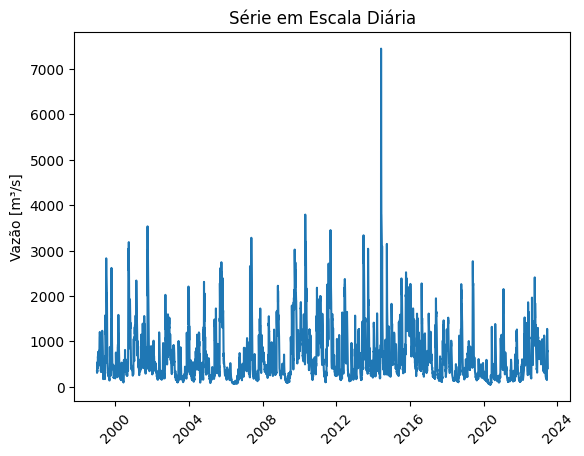

In [23]:
x = df["data"]
y = df["vazao"]
plt.plot(x, y)
plt.xticks(rotation=45)
plt.ylabel("Vazão [m³/s]")
plt.title("Série em Escala Diária")

## Desagregação 1
Interpolação Repetição Escada

In [28]:
def desagregacao_horaria_1(data):

  df_1 = data.repeat(24)
  df_1.reset_index(drop=True, inplace=True)
  df_1 = pd.DataFrame(df_1)

  df_1["data"] = pd.date_range(start='1999-01-01 00:00:00', periods=len(df_1), freq='H')
  df_1.set_index('data', inplace=True)

  return df_1

In [35]:
df1 = desagregacao_horaria_1(df["vazao"])
df1.head()

,vazao
data,
1999-01-01 00:00:00,340
1999-01-01 01:00:00,340
1999-01-01 02:00:00,340
1999-01-01 03:00:00,340
1999-01-01 04:00:00,340


Text(0.5, 1.0, 'Desagregação Horária da Vazão 1')

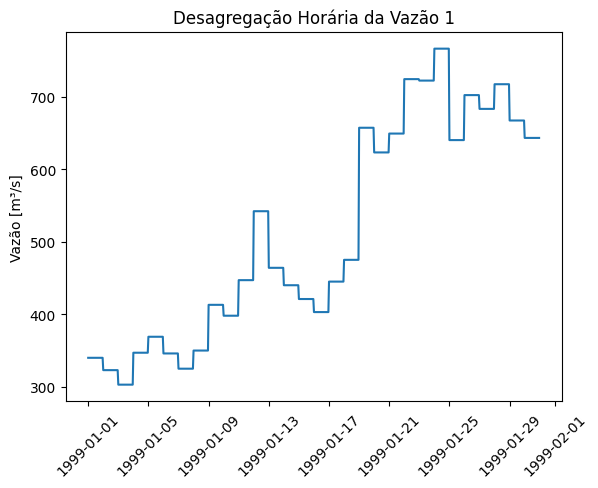

In [36]:
df1_recorte = df1.loc[pd.to_datetime('1999-01-01 00:00:00'):pd.to_datetime('1999-01-30 23:00:00')]
plt.plot(df1_recorte["vazao"])
plt.xticks(rotation=45)
plt.ylabel("Vazão [m³/s]")
plt.title("Desagregação Horária da Vazão 1")

## Desagregação 2
Interpolação Spline Cúbica

In [40]:
def desagregacao_horaria_2(df):

  # Inicialize uma lista vazia para armazenar os valores horários interpolados
  valores_horarios = []

  # Itere sobre as datas diárias e faça a interpolação cúbica entre elas
  for i in range(len(df.index) - 1):
      data_inicial = df.index[i]
      data_final = df.index[i + 1]

      # Use a interpolação cúbica (spline) para interpolar entre os valores diários
      x = np.array([0, 24])  # Pontos de dados originais (0 e 24)
      y = np.array([df.loc[data_inicial], df.loc[data_final]])
      cs = CubicSpline(x, y, bc_type='natural')  # bc_type='natural' para condições de contorno naturais

      # Interpole para os 24 pontos horários
      x_horario = np.arange(24)
      valores_diarios = df.loc[data_inicial]
      valores_horarios.extend(cs(x_horario))

  df_2 = pd.DataFrame(valores_horarios)
  df_2.columns = ['vazao']
  df_2["data"] = pd.date_range(start='1999-01-01 00:00:00', periods=len(df_2), freq='H')
  df_2.set_index('data', inplace=True)

  return df_2

In [41]:
df2 = desagregacao_horaria_2(df["vazao"])
df2.head()

,vazao
data,
1999-01-01 00:00:00,340.000000
1999-01-01 01:00:00,339.291667
1999-01-01 02:00:00,338.583333
1999-01-01 03:00:00,337.875000
1999-01-01 04:00:00,337.166667


Text(0.5, 1.0, 'Desagregação Horária da Vazão 2')

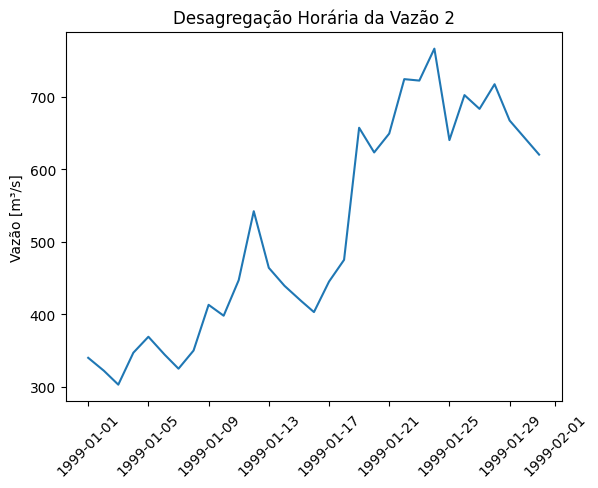

In [42]:
df2_recorte = df2.loc[pd.to_datetime('1999-01-01 00:00:00'):pd.to_datetime('1999-01-30 23:00:00')]
plt.plot(df2_recorte["vazao"])
plt.xticks(rotation=45)
plt.ylabel("Vazão [m³/s]")
plt.title("Desagregação Horária da Vazão 2")

## Comparação Dados Originais x Spline

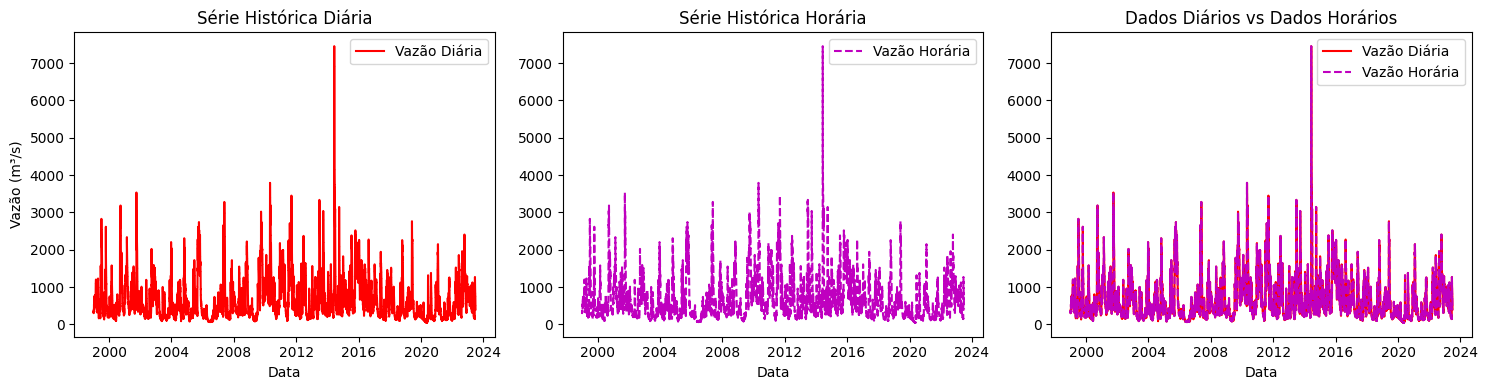

In [43]:
# Criação da figura e dos subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Primeiro gráfico
ax1 = axes[0]
ax1.plot(df1, 'r-', label='Vazão Diária')  # Plotagem da primeira variável com unidades em metros no eixo primário
ax1.set_xlabel('Data')
ax1.set_ylabel('Vazão (m³/s)')
ax1.set_title('Série Histórica Diária')

# Exibição das legendas
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='upper right')

# Segundo gráfico
ax2 = axes[1]
ax2.plot(df2, 'm--', label='Vazão Horária')  # Plotagem da primeira variável com unidades em metros no eixo primário
ax2.set_xlabel('Data')
ax2.set_title('Série Histórica Horária')

# Exibição das legendas
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines2, labels2, loc='upper right')

# Terceiro gráfico
ax3 = axes[2]
ax3.plot(df1, 'r-', label='Vazão Diária')
ax3.plot(df2, 'm--', label='Vazão Horária')
ax3.set_xlabel('Data')
ax3.set_title('Dados Diários vs Dados Horários')

# Exibição das legendas
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines3, labels3, loc='upper right')

# Ajustar a posição dos subplots
fig.tight_layout()

# Exibir a figura com os dois gráficos
plt.show()